![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, ©  Óscar Araque

## [Introduction to Machine Learning III](2_4_0_Intro_NN.ipynb)

# MultiLayer Perceptron (MLP) Introduction

Multilayer perceptrons, also called feedforward neural networks or deep feedforward networks, are the most basic deep learning models.

<img src="images/multilayerperceptron_network.png" alt="Drawing" style="width: 400px;"/>

In this notebook we are going to try the spiral dataset with different algorthms. In particular, we are going to focus our attention on the MLP classifier.


Answer directly in your copy of the exercise and submit it as a moodle task.

## Load dataset

In [1]:
# Show plots in the notebooks
%matplotlib inline

In [2]:
# Load the utilities
from spiral import *

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

Number of classes: 5


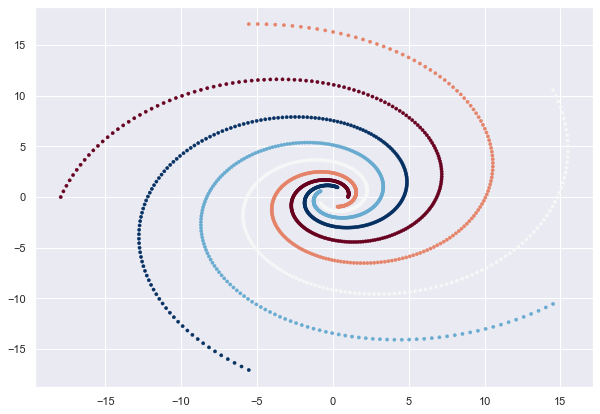

In [4]:
# load and plot the spiral dataset
n_classes = 5
X, y = load_spiral_dataset(n_classes=n_classes)

plt.figure(figsize=(10,7))
plot_dataset(X, y)

print('Number of classes: {}'.format(n_classes))

In [5]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

# split the dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# check the dimensions
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1050, 2)
(450, 2)
(1050,)
(450,)


The features are simply the position of each point in the 2 dimension plane.

In other words, a point $\mathbf{x}$ is represented by its values $x_1$ and $x_2$:

$\mathbf{x} = [x_1, x_2] $

## Perform the classification task on several classifiers

Following, the classification on the spiral is done with several classifiers. We can see the performance on each class (each spiral), and their decision surfaces.

### Logistic Regression

LR
              precision    recall  f1-score   support

           0       0.29      0.35      0.32        83
           1       0.31      0.28      0.29        90
           2       0.20      0.23      0.21        79
           3       0.34      0.29      0.31       109
           4       0.25      0.25      0.25        89

    accuracy                           0.28       450
   macro avg       0.28      0.28      0.28       450
weighted avg       0.28      0.28      0.28       450



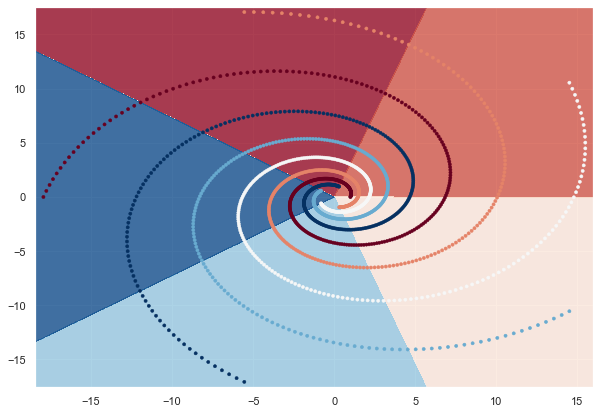

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(n_jobs=-1)
lr.fit(X,y)

lr_preds = lr.predict(X_test)

print('LR')
print(classification_report(y_test, lr_preds))

plt.figure(figsize=(10,7))
# This methods outputs a visualization
# the h parameter adjusts the precision of the visualization
# if you find memory errors, set h to a higher value (e.g., h=0.1)
plot_decision_surface(X, y, lr, h=0.02) 

### k-NN

K-NN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        83
           1       1.00      1.00      1.00        90
           2       1.00      1.00      1.00        79
           3       1.00      1.00      1.00       109
           4       1.00      1.00      1.00        89

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



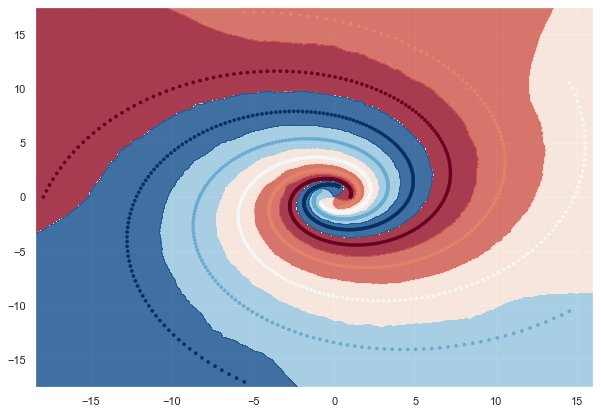

In [7]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_preds = knn.predict(X_test)

print('K-NN')
print(classification_report(y_test, knn_preds))

plt.figure(figsize=(10,7))
plot_decision_surface(X, y, knn)

### Gaussian Naive Bayes

GaussianNB
              precision    recall  f1-score   support

           0       0.24      0.36      0.29        83
           1       0.22      0.16      0.18        90
           2       0.22      0.29      0.25        79
           3       0.33      0.27      0.30       109
           4       0.29      0.22      0.25        89

    accuracy                           0.26       450
   macro avg       0.26      0.26      0.25       450
weighted avg       0.26      0.26      0.26       450



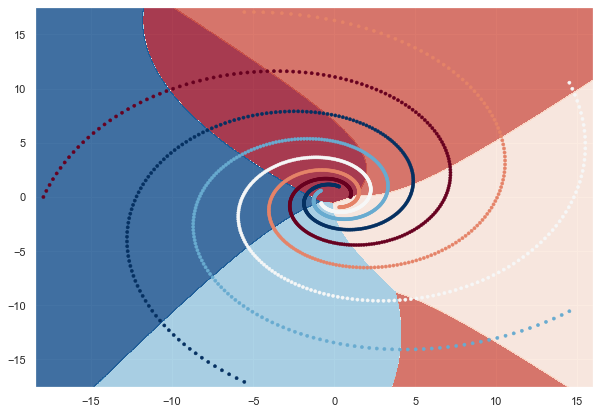

In [8]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

gnb_preds = gnb.predict(X_test)

print('GaussianNB')
print(classification_report(y_test, gnb_preds))

plt.figure(figsize=(10,7))
plot_decision_surface(X, y, gnb)

### SVM

SVM
              precision    recall  f1-score   support

           0       0.50      0.63      0.55        83
           1       0.62      0.56      0.59        90
           2       0.48      0.52      0.50        79
           3       0.71      0.61      0.65       109
           4       0.61      0.60      0.60        89

    accuracy                           0.58       450
   macro avg       0.58      0.58      0.58       450
weighted avg       0.59      0.58      0.58       450



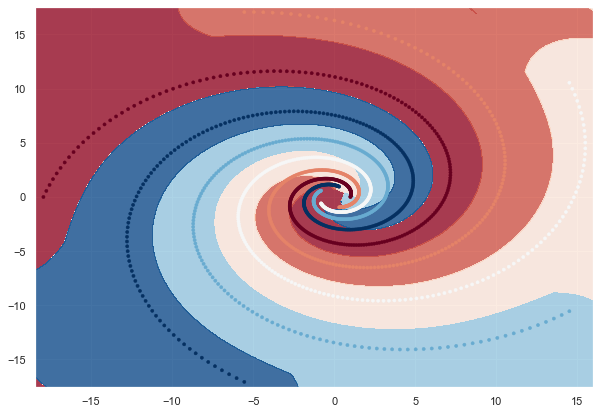

In [9]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

svc_preds = svc.predict(X_test)

print('SVM')
print(classification_report(y_test, svc_preds))

plt.figure(figsize=(10,7))
plot_decision_surface(X, y, svc)

### MLP

C:\Users\Carlos\.conda\envs\Python3_6\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP
              precision    recall  f1-score   support

           0       0.25      0.39      0.30        83
           1       0.50      0.37      0.42        90
           2       0.40      0.44      0.42        79
           3       0.50      0.19      0.28       109
           4       0.32      0.45      0.37        89

    accuracy                           0.36       450
   macro avg       0.39      0.37      0.36       450
weighted avg       0.40      0.36      0.36       450



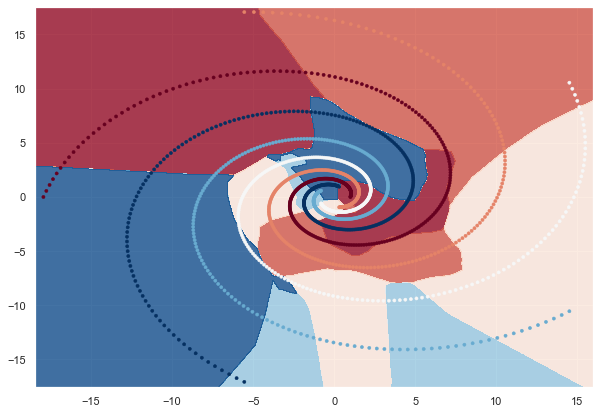

In [10]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

mlp_preds = mlp.predict(X_test)

print('MLP')
print(classification_report(y_test, mlp_preds))

plt.figure(figsize=(10,7))
plot_decision_surface(X, y, mlp)

We see that some classifiers (kNN, SVM) successfully learn the spiral problem. They can classify correctly in any part of the plane.

Nevertheless, some classifiers (Logistic Regression, Gaussian Naive Bayes) are not able to learn the spiral pattern with their default configurations.

In particular, the MLP performs very bad: it is not able to learn the spiral function. Nevertheless, it should be able to.

**QUESTION: Why do you think that MLP does not learn the spiral pattern?**

Answer here: Porque se usan coordenadas esféricas


# Try to make the MLP learn the spiral!

Your task is to learn the spiral with the MLP classifier.

Write the necessary code in the following cells.

You should try to change some parameters of the MLPClassifier. Some parameters that you can change are:
- complexity of the network
- regularization of the network
- new features that are passed to the network

You can search inspiration on [this playground](http://playground.tensorflow.org).

C:\Users\Carlos\.conda\envs\Python3_6\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLP
0.35555555555555557


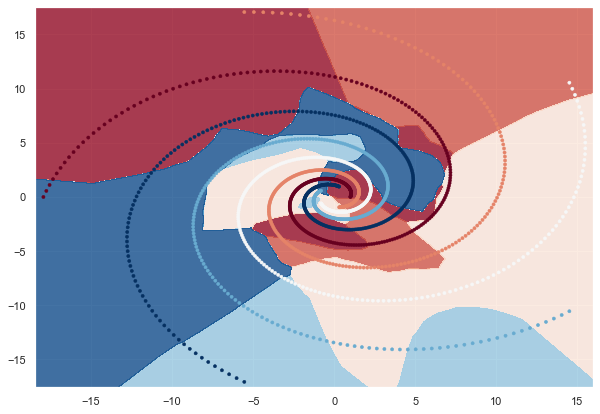

In [11]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=300)
clf = mlp.fit(X_train, y_train)

clf.predict(X_test[:1])
clf.predict(X_test[:5, :])
clf.score(X_test, y_test)

print('MLP')
print(clf.score(X_test, y_test))

plt.figure(figsize=(10,7))
plot_decision_surface(X, y, clf)

# References

* [MLP documentation](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)


## Licence

The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Óscar Araque, Universidad Politécnica de Madrid.